
<h1><b>CROP RECOMMENDATION SYSTEM </b></h1>
<h1> Goal:To recommend optimum crops to be cultivated by farmers based on several parameters and help them make an informed decision before cultivation
</h1>

<p><h3>The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. It also contains the humidity, temperature, and rainfall required for a particular crop. </h3></p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#file_path = '/content/drive/My Drive/202101135_Lav/IE406_Project/fertilizer_recommendation.csv'
# file_path = '/content/drive/My Drive/202101135_Lav/IE406_Project/Crop_recommendation.csv'

Mounted at /content/drive


In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


file_path_1 = '/content/drive/My Drive/202101135_Lav/IE406_Project/Crop_recommendation.csv'
df = pd.read_csv(file_path_1)


In [ ]:
print(df.columns)
print("\n")
print(df['label'].unique())
print("\n")
print(df['label'].value_counts())

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


<h1> Seperating features and target label </h1>

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']



In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)




## KNN Classification

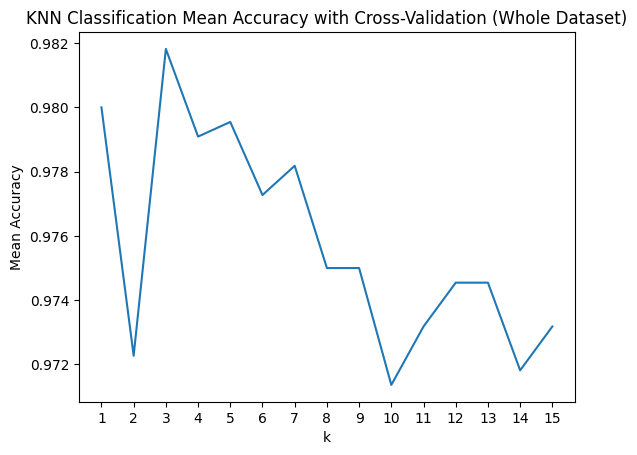

Best accuracy: 0.9818181818181818
Best k: 3
Overall Accuracy: 0.9890909090909091
Precision: 0.9892452715624739
Recall: 0.989090909090909
F1 Score: 0.9891275255668076


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score



# Define a range of k values to try
k_values = range(1,16)  # Try k from 1 to 30

# Initialize lists to store mean accuracies for each k
mean_accuracies = []
# Initialize variables to store max accuracy and corresponding k
max_accuracy = 0
best_k = 0
# Loop through each k value
for k in k_values:
    # Initialize KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation
    accuracies = cross_val_score(knn, features, labels, cv=5)

    # Calculate mean accuracy
    mean_accuracy = np.mean(accuracies)
    mean_accuracies.append(mean_accuracy)

    # Check if current accuracy is higher than the maximum
    if mean_accuracy > max_accuracy:
        max_accuracy = mean_accuracy
        best_k = k

# Plot the mean accuracies
plt.plot(k_values, mean_accuracies)
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.title('KNN Classification Mean Accuracy with Cross-Validation (Whole Dataset)')
plt.xticks(k_values)
plt.show()


# Initialize KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features,labels)

print("Best accuracy:", max_accuracy)
print("Best k:", best_k)

acc.append(max_accuracy)
model.append('KNN')

predicted_values = knn.predict(features)

# Calculate accuracy
accuracy = accuracy_score(labels, predicted_values)

# Calculate precision
precision = precision_score(labels, predicted_values, average='macro')

# Calculate recall
recall = recall_score(labels, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(labels, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


<h1> Decision Tree </h1>

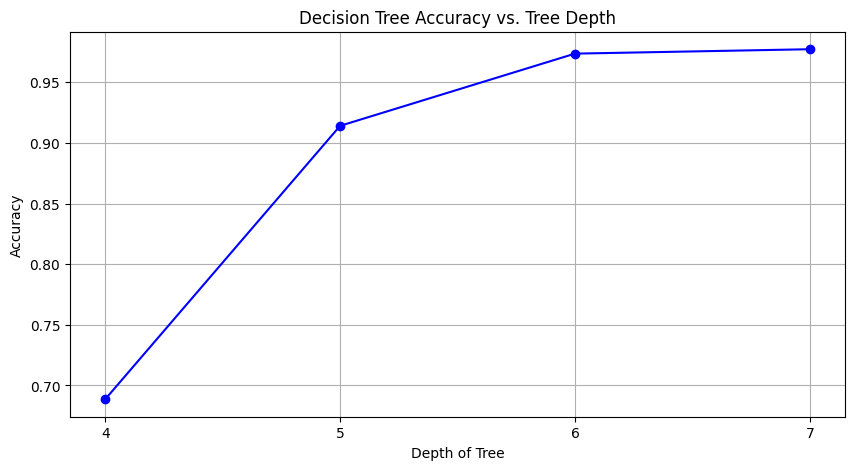


Overall Accuracy: 0.9590909090909091
Precision: 0.9625946969696969
Recall: 0.9545649573538589
F1 Score: 0.956287459310715




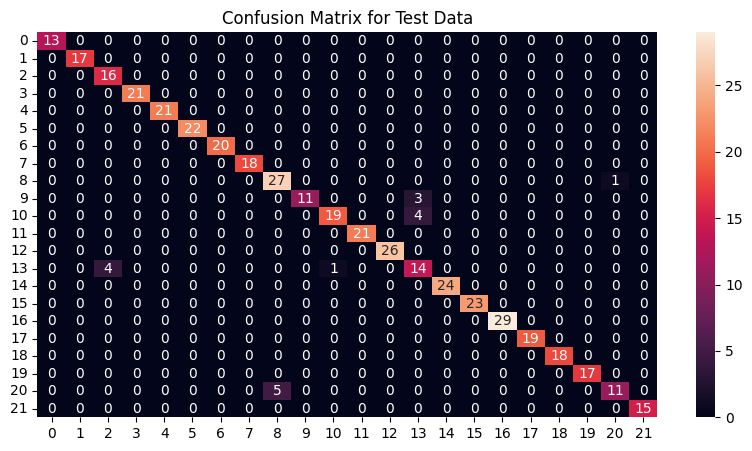

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have features and target variables defined
# Xtrain, Ytrain, Xtest, Ytest

depths = range(4, 8)  # Testing depths from 4 to 7
accuracies = []
acc = []
model = []

# Iterate over the specified range of tree depths
for depth in depths:
    # Create the Decision Tree model with the specified depth
    DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=depth)

    # Perform cross-validation and calculate the mean score
    scores = cross_val_score(DecisionTree, features, target, cv=5)
    mean_score = np.mean(scores)
    accuracies.append(mean_score)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Accuracy vs. Tree Depth')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(depths)  # Ensure all depth values are marked
plt.show()

# Train the Decision Tree with the chosen depth
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=6)
DecisionTree.fit(Xtrain, Ytrain)

# Predict using the trained model
predicted_values = DecisionTree.predict(Xtest)

# Cross-validation score with the chosen depth
scores = cross_val_score(DecisionTree, features, target, cv=5)
mean_score = np.mean(scores)

# Append the accuracy and model name for comparison
acc.append(mean_score)
model.append('Decision Tree')

# Calculate various evaluation metrics
accuracy = accuracy_score(Ytest, predicted_values)
precision = precision_score(Ytest, predicted_values, average='macro')
recall = recall_score(Ytest, predicted_values, average='macro')
f1 = f1_score(Ytest, predicted_values, average='macro')

print("\nOverall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot the confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(Ytest, predicted_values), annot=True)
plt.title("Confusion Matrix for Test Data")
plt.show()


<h1> Guassian Naive Bayes </h1>



In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
score = cross_val_score(NaiveBayes,features,target,cv=5)
mean_score = np.mean(score)
acc.append(mean_score)

#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Naive Bayes's Accuracy is:  0.9950000000000001
Overall Accuracy: 0.990909090909091
Precision: 0.9943181818181818
Recall: 0.9886363636363636
F1 Score: 0.9904761904761905


<h1> Support Vector Machine (SVM) </h1>

In [ ]:
from sklearn.svm import SVC
# Define the SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
accuracies = []
SVM_models = []
for kernel in kernels:
    if kernel == 'poly':
        SVM = SVC(kernel=kernel, gamma='auto', degree=3)  # Poly kernel with degree 3
    else:
        SVM = SVC(kernel=kernel, gamma='auto')  # Linear or Gaussian (rbf) kernel

    # Train the SVM model
    SVM.fit(Xtrain, Ytrain)

    # Predict on the test set
    predicted_values = SVM.predict(Xtest)

    # Calculate accuracy using cross-validation
    score = cross_val_score(SVM, features, target, cv=5)
    mean_score = np.mean(score)
    accuracies.append(mean_score)
    SVM_models.append('SVM with ' + kernel + ' kernel')
    print("SVM with", kernel, "kernel's Accuracy is:", mean_score)

# Compare results
for i in range(len(SVM_models)):
    print(SVM_models[i] + "'s Accuracy:", accuracies[i])



acc.append(max(accuracies))
model.append('SVM')


SVM = SVC(kernel= 'linear',gamma='auto')
SVM.fit(Xtrain,Ytrain)
predicted_values = SVM.predict(Xtest)

#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




SVM with linear kernel's Accuracy is: 0.985
SVM with poly kernel's Accuracy is: 0.9781818181818182
SVM with rbf kernel's Accuracy is: 0.27999999999999997
SVM with linear kernel's Accuracy: 0.985
SVM with poly kernel's Accuracy: 0.9781818181818182
SVM with rbf kernel's Accuracy: 0.27999999999999997
Overall Accuracy: 0.9772727272727273
Precision: 0.9780844155844156
Recall: 0.9775860104807473
F1 Score: 0.9777299430257397


<h1> Logistic Regression </h1>

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)

# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score_mean = np.mean(score)
acc.append(score_mean)
model.append('Logistic Regression')

#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Overall Accuracy: 0.9522727272727273
Precision: 0.9540378567543254
Recall: 0.9486827865117339
F1 Score: 0.9504447004043698


<h1> Random Forest </h1>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score_mean = np.mean(score)
acc.append(score_mean)
model.append('RF')


#calculate accuracy
accuracy = accuracy_score(Ytest, predicted_values)

# Calculate precision
precision = precision_score(Ytest, predicted_values, average='macro')

# Calculate recall
recall = recall_score(Ytest, predicted_values, average='macro')

# Calculate F1 score
f1 = f1_score(Ytest, predicted_values, average='macro')



print("Overall Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Overall Accuracy: 0.990909090909091
Precision: 0.992927376229084
Recall: 0.989084928229665
F1 Score: 0.9903806458718525


<h1> Accuracy Comparison </h1>

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

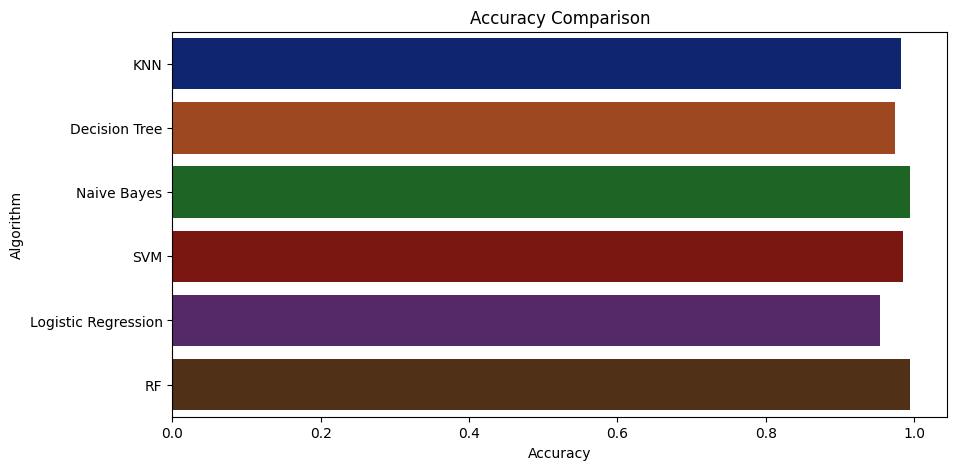

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

KNN --> 0.9818181818181818
Decision Tree --> 0.9736363636363636
Naive Bayes --> 0.9950000000000001
SVM --> 0.985
Logistic Regression --> 0.9545454545454545
RF --> 0.9945454545454545


<h1> Making a prediction </h1>

knn , DecisionTree , NaiveBayes , SVM , LogReg , RF


In [ ]:
N = 85
P = 57
K = 42
temperature =22.87
humidity = 83.5445
ph = 6.785
rainfall = 224.5875

data = np.array([[N,P, K, temperature, humidity,ph, rainfall]])


# Predict outputs for selected data using each model
knn_output = knn.predict(data)
logreg_output = LogReg.predict(data)
rf_output = RF.predict(data)
nb_output = NaiveBayes.predict(data)
dt_output = DecisionTree.predict(data)
svm_output = SVM.predict(data)

# Print outputs
print("KNN:",knn_output)
print("Logistic Regression Output:", logreg_output)
print("Random Forest Output:", rf_output)
print("Naive Bayes Output:", nb_output)
print("Decision Tree Output:", dt_output)
print("SVM Output:", svm_output)

KNN: ['rice']
Logistic Regression Output: ['rice']
Random Forest Output: ['rice']
Naive Bayes Output: ['rice']
Decision Tree Output: ['rice']
SVM Output: ['rice']
